## 1. KaKR_ML Month Car Model Classification

<blockquote>
<b>Deeperence 멱살 스터디는...</b><br>
숭실대학교 머신러닝 소모임 Deeperence에서 진행하는 'Vision AI 멱살 스터디'는 처음 비전 인공지능에 입문하신 분들을 대상으로 한달간 세 가지 태스크(Classification, Detection, Segmentation)를 속성으로 경험시켜 드리는 스터디입니다. 이름 그대로 멱살을 잡아끄는 듯한 초밀착 멘토링으로 가려운 곳을 시원하게 긁어 드립니다. (이 핸즈온 튜토리얼은 Deeperence, 강남 캐글스터디 초급to고급, 제 <a href = "https://brstar96.github.io/">개인 블로그</a>에 연재됩니다.)<br><br>
<i>Written by Myeong-Gyu.LEE, 2019-12-20</i>
</blockquote>
</blockquote>

안녕하세요, Deeperence 멱살 스터디 두 번째 시간엔 [캐글코리아](https://www.facebook.com/groups/KaggleKoreaOpenGroup/)라는 비영리 페이스북 그룹의 세 번째 대회인 2019 3rd ML month with KaKR 베이스라인을 함께 보도록 하겠습니다. MNIST를 마치고 오신 분들이 3채널 RGB 이미지를 처음 마주하게 되면 멘탈이 흔들리실 수 있는데요, 흔히 RGB 이미지를 2차원 배열로 알고 계신 분들이 많기 때문에 이번 튜토리얼에서 지금껏 우리가 보아 왔던 이미지의 실체(?)를 파악하고 어떻게 RGB 이미지를 핸들링해 분류 문제를 해결할 수 있을지 고민해 보겠습니다. [KaKR 3rd 차종분류 대회](https://www.kaggle.com/c/2019-3rd-ml-month-with-kakr)의 데이터셋은 [대회 참가](https://www.kaggle.com/t/4f86a975437f49a9ab14b0fb38482251)를 하셔야 접근하실 수 있습니다. 


<u><b>▶튜토리얼을 시작하기 전, 이 Colab Notebook의 사본을 개인 드라이브에 복사하신 후 사본으로 재접속해 주세요!</b><br>
<u><b>▶튜토리얼을 시작하기 전, Google Colab 상단의 메뉴 중 런타임->런타임 유형 변경에서 하드웨어 가속기를 GPU로 설정해 주세요!</b>
<center><img src='http://drive.google.com/uc?export=view&id=1A53ZszYoOeND9m2pT5ymXgM6dZeEK2QR' /><br></center></u>



<blockquote>
<b>▶ 캐글이 뭔가요?</b><br>
<img src='http://drive.google.com/uc?export=view&id=1ubINh26gLKLvOhRSLZqNcNOWzLo4Yqw2' /><br>

Kaggle은 빅데이터 솔루션 회사입니다. 정형 데이터와 비정형 데이터 부문에서 전 세계의 수많은 사람들이 자웅을 겨루고 있죠. 그렇다면 정형 데이터와 비정형 데이터의 차이는 뭘까요?

- 정형 데이터 : Structured, 즉 구조화되어 있는 데이터를 의미합니다. 관계형 데이터베이스(RDB), 스프레드시트, CSV등이 정형 데이터에 속하고, 유명한 정형데이터 캐글 대회로는 아래의 대회들이 있습니다. 
  - Home Credit : 고객이 앞으로 대출 상환을 할 것인지 예측하는 대회
  - ELO : 거래 내역 데이터를 토대로 고객 충성도를 예측하는 대회
  - New York Taxi : 택시의 탑승 시간을 예측하는 대회
  - 직방 대회 : 아파트의 거래 가격을 예측하는 대회
- 비정형 데이터 : 형태가 없고, 연산이 어려운 데이터를 의미합니다. 예컨대 SNS로부터 수집한 텍스트나, 이미지 및 영상, 음성 등이 여기에 포함됩니다. 비정형 데이터를 핸들링하는 데에는 보통 딥러닝을 많이 사용합니다. 
  - Google Doodle : 340개의 클래스를 갖는 낙서를 ANN(Artificial Neural Network)으로 분류하는 대회
  - Airbus : 바다 위 배를 찍은 위성 사진으로부터 배의 위치를 찾아내는(Detection) 대회입니다. 

다양한 캐글 대회에 참여하고 상위권 솔루션들을 공부해 보면 현실 문제를 정하고 어떻게 데이터를 수집하고 분석해야 할지 뿐만 아니라 문제에 맞는 모델을 만드는 데에 도움을 얻을 수 있습니다. 이 말은 즉 Problem solving을 얼마나 잘 하는지와 직결되고, 따라서 많은 회사들에서 이러한 이유로 대회 경력이 많은 사람들을 선호하죠. 캐글 뿐만이 아닌 다양한 대회에 참여함으로서 우리는 어떻게 주어진 데이터를 AI가 풀기 좋게 준비하고 변형할지에 대한 고찰을 해 볼 수 있습니다. 이 과정을 Feature Engineering이라고 부르죠.

캐글 본사는 '회사'이지만, 캐글 코리아는 허가 하에 캐글의 상표를 빌려 비영리 활동을 하는 단체입니다. 종종 자동차 분류 대회와 같이 입문자들이 입문하기 쉬운 대회들을 개최하고 있습니다.
</blockquote><br><br>

본격적인 시작에 앞서 업그레이드가 필요한 모듈을 업그레이드해 주겠습니다. `tqdm` 모듈은 반복문 등의 진행 상태를 편하게 표시할 수 있도록 도와주는 모듈입니다. 모듈 설치/업그레이드가 끝난 후 `Restart runtime`버튼을 클릭해 런타임을 재시작해 주세요.

In [0]:
!pip install tqdm --upgrade

     |████████████████████████████████| 61kB 9.1MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


### 1.1 캐글과 Google Colab 연동해 데이터셋 다운로드받기
캐글 서버에 올려져 있는 무거운 데이터를 돌리고 싶은데 하드웨어 환경이 마땅치 않을 경우 데이터셋을 Google Colab에 다운로드하면 언제 어디서나 편리하게 사용하실 수 있을 거예요. 

제일 먼저 할 것은 현재 Google Colab 활성화 세션에 `kaggle.json` 파일을 업로드해 주는 것입니다. `kaggle.json` 파일은 아래와 같은 방법으로 얻으실 수 있습니다. 우선 본인의 [kaggle](https://www.kaggle.com/) 계정에 로그인하신 후, `My Account` 페이지를 내리다 보면 나오는 `API` 항목에서 `Create New API Token`을 클릭하세요. 그러면 `kaggle.json`파일이 곧바로 다운로드됩니다. 이 파일을 현재 세션에 업로드해주도록 하겠습니다.

<img src='http://drive.google.com/uc?export=view&id=1U0cQWY0B4HQQToz6qHEWcAi8cGzW1IuZ' /><br>

에러가 발생하면 셀을 다시 한 번 실행해 주세요.

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"myeonggyu","key":"b63d5d55118bc55451a9bbf0d4d36d7e"}'}

그 다음으로 할 것은 `/root/.kaggle` 디렉토리를 만들고 `kaggle.json`파일을 옮겨 주는 것입니다. Google Colab의 노트북은 리눅스 커널을 받아 돌아가기 때문에, 리눅스 파일 관리 명령어를 사용해 주어야 합니다.

In [0]:
!dir

kaggle.json  sample_data


In [0]:
!mkdir -p ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

이후, kaggle 모듈을 다운로드해 줍니다. (`Requirement already satisfied`문구는 이미 해당 모듈이 시스템에 설치되어 있는 경우 표시되는 메시지입니다. 그대로 다음 셀로 진행하셔도 됩니다.)

In [0]:
!pip install kaggle

이제 자동차 분류를 위한 데이터셋을 Google Colab 현재 세션으로 다운로드해 보겠습니다. 우선 대회마다 발급되어 있는 데이터셋 다운로드 명령어가 필요한데, 각 대회별로 존재하는 `Data` -> `API` 항목에서 찾으실 수 있습니다. 

<img src='http://drive.google.com/uc?export=view&id=1L2Fpd1qbFDWSVhXn4wsMPQD0pyCD51GK' width = 500><br>
 
 이 명령어를 Google Colab의 셀에 입력하면 데이터셋을 다운로드할 수 있습니다. 


In [0]:
!kaggle competitions download -c 2019-3rd-ml-month-with-kakr

  0% 0.00/132k [00:00<?, ?B/s]
100% 132k/132k [00:00<00:00, 40.5MB/s]
100% 1.14G/1.14G [00:05<00:00, 256MB/s]
100% 1.14G/1.14G [00:05<00:00, 234MB/s]
  0% 0.00/343k [00:00<?, ?B/s]
100% 343k/343k [00:00<00:00, 112MB/s]
  0% 0.00/6.19k [00:00<?, ?B/s]
100% 6.19k/6.19k [00:00<00:00, 4.38MB/s]
100% 700M/700M [00:07<00:00, 37.2MB/s]

  0% 0.00/184k [00:00<?, ?B/s]
100% 184k/184k [00:00<00:00, 174MB/s]
  0% 0.00/108k [00:00<?, ?B/s]
100% 108k/108k [00:00<00:00, 92.7MB/s]


정상적으로 데이터셋이 다운로드되었네요! 이제 본격적으로 시작해 봅시다.

### 1.2 대회 소개
자동차 이미지 데이터셋을 이용한 자동차 차종 분류 대회의 데이터셋은 9,990개의 Train set + 6,150개의 Test set = 총합 16,140개의 이미지와 바운딩박스 좌표로 이루어져 있습니다. 사실 MNIST를 갓 마친 분들은 cifar를 돌려 보는 것이 국룰이지만, 저희는 좀 더 어려운 문제에 도전해 보도록 하겠습니다.

CNN을 활용해 강아지와 고양이를 분류하는 문제에서는 문제가 비교적 쉽게 해결됩니다. 강아지와 고양이에게 드러나는 특징이 꽤 크기 때문이죠. 하지만 자동차라는 하나의 카테고리에서 브랜드가 같거나 비슷하게 생긴 이미지들의 차종을 분류하는 문제는 상당히 복잡합니다. 이 대회에서는 제공된 데이터셋을 이용해 196개의 차종 클래스를 분류하는 것이 목표였습니다. 많은 대회들에서 csv 형태로 이미지 데이터를 제공해 주기 때문에 이번 튜토리얼을 통해 조금 더 현실에 가까운 형태의 데이터를 핸들링하실 수 있게 될 거예요. MNIST는 매우 심플한 데이터이기 때문에 정확도 90% 이상을 보실 수 있었지만, 이번 튜토리얼의 자동차 데이터셋은 상당히 복잡하기 때문에 90%의 성능이 나오지는 않을 것입니다. 어떻게 이 정확도를 높일지 고민하는 것이 모든 대회 참가자의 공통된 고민이죠. 이번 튜토리얼에서는 자동차 차종 분류를 위해 시도해 볼 수 있는 가장 기본적인 아이디어에 대해 알아보고, 기회가 되어 후속 스터디를 할 수 있다면 다양한 테크닉들을 소개해 드릴게요.


- 캐글 서버로부터 다운로드받은 각 파일 별 세부 설명은 아래와 같습니다.
  - train.csv - Train 셋의 이미지 파일명, 바운딩박스 좌표, 차종정보
  - test.csv - Test 셋의 이미지 파일명, 바운딩박스 좌표, 차종정보
  - submission.csv - Test셋과 대응되는 제출 파일
  - class.csv - 데이터 셋의 class 컬럼과 대응되는 차종의 레이블
  - train.zip - Train 이미지 파일
  - test.zip - Test 이미지 파일
- .csv 컬럼 별 세부 설명은 아래와 같습니다. 
  - img_file - 데이터 셋의 각 로우와 연결되는 이미지 파일 이름
  - bbox_x1 - 바운딩 박스 x1 좌표 (좌상단 x) 
  - bbox_y1 - 바운딩 박스 y1 좌표 (좌상단 y)
  - bbox_x2 - 바운딩 박스 x2 좌표 (우하단 x)
  - bbox_y2 - 바운딩 박스 y2 좌표 (우하단 y)
  - class - 예측하려는 차종(Target)
  - id - 각 데이터 셋에 기입 되어 있는 클래스 id
  - name - 클래스 id에 대응되는 실제 차종 레이블

이번 튜토리얼에서는 `sample_submission.csv`에 매핑되어 있는 test image들의 차종 클래스를 예측해 학습을 하고 prediction을 만들어 실제 대회 서버에 late submission하는 과정까지 진행해 보겠습니다. 주최 측 태진 님이 올려 주신 Keras 버전 베이스라인을 저희는 Pytorch로 바꾸어 돌려 보겠습니다. 설명 중 많은 부분들은 태진 님, 세원 님, 태명 님의 베이스라인 커널을 빌려 진행하도록 하겠습니다.

### 1.3 데이터 준비하기
먼저 필요한 라이브러리 일부를 로드하고 경로를 세팅하겠습니다.

In [0]:
import torch
import gc, os, warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

DATA_PATH = './'
os.listdir(DATA_PATH)

['.config',
 'submission.csv',
 'test.zip',
 'class.csv',
 'train.zip',
 'sample_submission.csv',
 'train.csv',
 'test.csv',
 'sample_data']

이제 `.zip`파일들의 압축을 해제하고 학습에 사용할 데이터들의 path를 세팅해 주겠습니다. 

In [0]:
!unzip train.zip -d ./train
!unzip test.zip -d ./test
!rm train.zip
!rm test.zip

Archive:  train.zip
  inflating: ./train/train_00001.jpg  
  inflating: ./train/train_00002.jpg  
  inflating: ./train/train_00003.jpg  
  inflating: ./train/train_00004.jpg  
  inflating: ./train/train_00005.jpg  
  inflating: ./train/train_00006.jpg  
  inflating: ./train/train_00007.jpg  
  inflating: ./train/train_00008.jpg  
  inflating: ./train/train_00009.jpg  
  inflating: ./train/train_00010.jpg  
  inflating: ./train/train_00011.jpg  
  inflating: ./train/train_00012.jpg  
  inflating: ./train/train_00013.jpg  
  inflating: ./train/train_00014.jpg  
  inflating: ./train/train_00015.jpg  
  inflating: ./train/train_00016.jpg  
  inflating: ./train/train_00017.jpg  
  inflating: ./train/train_00018.jpg  
  inflating: ./train/train_00019.jpg  
  inflating: ./train/train_00020.jpg  
  inflating: ./train/train_00021.jpg  
  inflating: ./train/train_00022.jpg  
  inflating: ./train/train_00023.jpg  
  inflating: ./train/train_00024.jpg  
  inflating: ./train/train_00025.jpg  
  inf

In [0]:
!ls -a # 경로 내의 모든 항목들을 숨김 파일(.)까지 포함해서 조회

.   class.csv  sample_data	      submission.csv  test.csv	train.csv
..  .config    sample_submission.csv  test	      train


Data Description에 있는 파일 세부 정보입니다.

- train.csv - Train 셋의 이미지 파일명, 바운딩박스 좌표, 차종정보
- test.csv - Test 셋의 이미지 파일명, 바운딩박스 좌표, 차종정보
- submission.csv - Test셋과 대응되는 제출 파일
- class.csv - 데이터 셋의 class 컬럼과 대응되는 차종의 레이블
- train - Train 이미지 파일
- test - Test 이미지 파일

In [0]:
# 이미지 폴더 경로
TRAIN_IMG_PATH = os.path.join(DATA_PATH, 'train')
TEST_IMG_PATH = os.path.join(DATA_PATH, 'test')

`.csv`파일은 어떻게 핸들링하는 것이 좋을까요? 한줄씩 읽어 list단위로 관리해도 되지만, 그다지 효율적이어보이지는 않습니다. 기왕이면 구조화된 형태 그대로 쓰고 싶은데, `numpy`는 숫자형 자료만 핸들링할 수 있죠. 

이럴 때, 보통은 데이터분석가들이 사용하는 `Pandas` 프레임워크를 사용해 `.csv`파일을 다루게 됩니다. `Pandas` 프레임워크는 데이터 분석과 통계 분석을 위한 `R`이라는 스크립트 언어의 `dataframe` 데이터 타입을 참고해 만들어졌습니다. 이 `dataframe`은 `column`, `row`, `index` 세 가지 요소로 구성되어 있죠. 따라서 테이블 형식의 데이터를 다루는 데 적격입니다. `numpy`와는 다르게 `str` 자료형도 핸들링할 수 있고요. 

아래와 같이 `.csv`파일을 `pd.read_csv`함수에 넣어 주기만 하면 저희가 상상하는 정형 데이터의 모습 그대로 `pd.dataframe`객체를 만들 수 있습니다. 참조도 저희가 상상하는 구조 그대로 진행할 수 있죠. 이제 `df_train`, `df_test`, `df_class`이 세 개의 pandas dataframe 객체를 이용해 데이터를 탐험해 보겠습니다. 

In [0]:
# CSV 파일 경로
df_train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
df_test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
df_class = pd.read_csv(os.path.join(DATA_PATH, 'class.csv'))

### 1.4 Data Exploration(데이터 탐색해보기)

Data Exploration은 실제 데이터가 Description과 일치 하는지, 데이터는 어떻게 구성되어 있고 클래스 별로 어떤 분포를 가지고 있는지 등 데이터에 대한 전반적인 궁금증을 해결해보는 과정입니다. 

<blockquote>
<b>-- NOTE --</b><br>
비정형 데이터인 이미지 데이터에서는 클래스 밸런스, 이미지의 statistics(히스토그램 등)를 확인하는 정도로 제한적인 Data Exploration을 수행하지만, 정형 데이터 도메인에서는 EDA가 그야말로 꽃이라고 할 수 있을 정도로 많은 신경을 씁니다. 정형 데이터의 EDA 과정을 둘러보고 비전으로 돌아오면, 정말 할 것이 많지 않아 멍을 때리게 되죠.
</blockquote>

#### 1.4.1 Check Data
아래는 Data Description에 나와 있는 컬럼 별 세부 설명 입니다.

- img_file - 데이터 셋의 각 로우와 연결되는 이미지 파일 이름
- bbox_x1 - 바운딩 박스 x1 좌표 (좌상단 x)
- bbox_y1 - 바운딩 박스 y1 좌표 (좌상단 y)
- bbox_x2 - 바운딩 박스 x2 좌표 (우하단 x)
- bbox_y2 - 바운딩 박스 y2 좌표 (우하단 y)
- class - 예측하려는 차종(Target)
- id - 각 데이터 셋에 기입 되어 있는 클래스 id
- name - 클래스 id에 대응되는 실제 차종 레이블

In [0]:
df_train.head() # dataframe.head : 간소화된 dataframe의 일부를 출력

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
0,train_00001.jpg,1,80,641,461,108
1,train_00002.jpg,57,53,293,236,71
2,train_00003.jpg,35,42,227,160,76
3,train_00004.jpg,10,21,254,165,188
4,train_00005.jpg,1,67,772,573,44


In [0]:
df_test.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,test_00001.jpg,199,184,1116,809
1,test_00002.jpg,55,61,480,257
2,test_00003.jpg,42,123,602,413
3,test_00004.jpg,13,8,619,393
4,test_00005.jpg,8,9,209,93


`os`모듈의 `listdir`함수는 해당 디렉토리 내의 모든 파일 리스트를 리스트로 받아옵니다. 현재 디렉토리에 다운로드되어 있는 파일들의 리스트를 쭉 읽어 대회 주최측이 올린 전체 파일 리스트와 대조해 보면 어떤 파일이 누락되어 있는지를 알 수 있겠죠. 

In [0]:
# Data 누락 체크
if set(list(df_train.img_file)) == set(os.listdir(TRAIN_IMG_PATH)) :
    print("Train file 누락 없음!")
else : 
    print("Train file 누락")

if set(list(df_test.img_file)) == set(os.listdir(TEST_IMG_PATH)) :
    print("Test file 누락 없음!")
else : 
    print("Test file 누락")

Train file 누락 없음!
Test file 누락 없음!


In [0]:
# Data 갯수
print("Number of Train Data : {}".format(df_train.shape[0]))
print("Number of Test Data : {}".format(df_test.shape[0]))

Number of Train Data : 10016
Number of Test Data : 6169


In [0]:
df_class.head()

,id,name
0,1,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012


`df_class` 데이터프레임은 자동차의 차종 정보를 담고 있습니다. 

In [0]:
print("타겟 클래스 총 갯수 : {}".format(df_class.shape[0]))
print("Train Data의 타겟 종류 갯수 : {}".format(df_train['class'].nunique()))

타겟 클래스 총 갯수 : 196
Train Data의 타겟 종류 갯수 : 196


#### Class Distribution
분류 문제에서 가장 먼저 의심해봐야 할 부분이 바로 Target Class의 분포입니다. 학습에 사용해야 하는 Train Set의 타겟 분포를 확인해서 밸런스가 어떤 상황인지 체크해야 합니다.

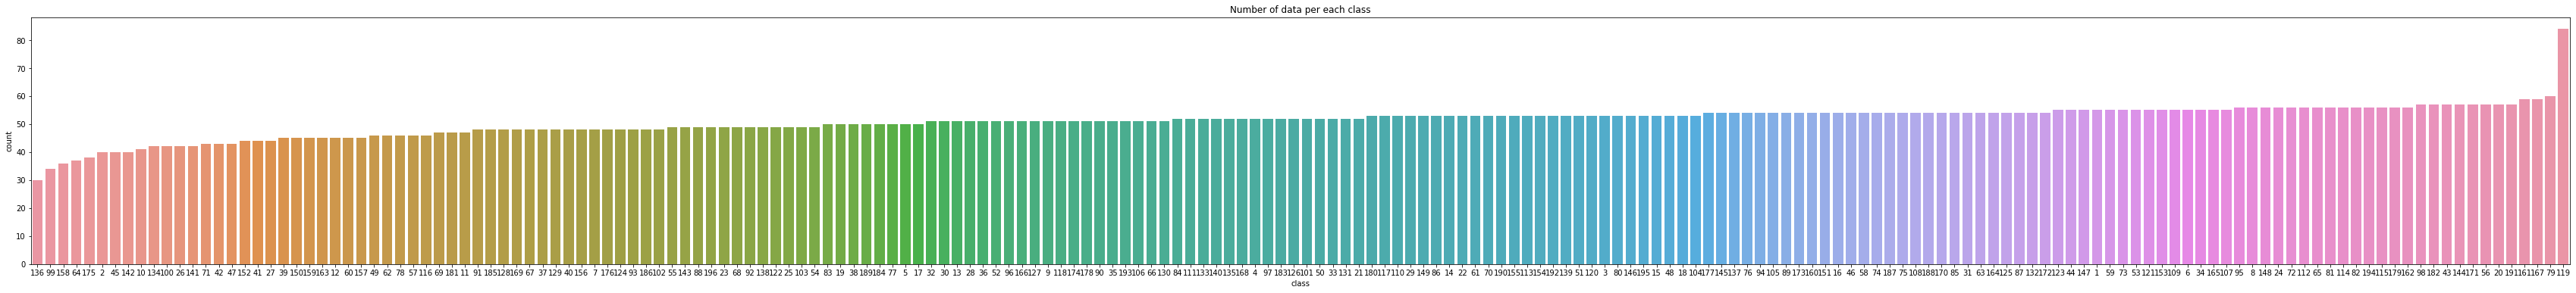

In [0]:
plt.figure(figsize=(60, 6)) # class id가 겹쳐 출력되지 않게 고의로 가로 사이즈를 늘렸습니다.
sns.countplot(df_train["class"], order=df_train["class"].value_counts(ascending=True).index)
plt.title("Number of data per each class")
plt.show()

In [0]:
cntEachClass = df_train["class"].value_counts(ascending=False)
print("Class with most count  : {}".format(cntEachClass.index[0]))
print("Most Count : {}".format(cntEachClass.max()))

print("Class with fewest count  : {}".format(cntEachClass.index[-1]))
print("Fewest Count : {}".format(cntEachClass.min()))

print("Mean  : {}".format(cntEachClass.mean()))

Class with most count  : 119
Most Count : 84
Class with fewest count  : 136
Fewest Count : 30
Mean  : 51.10204081632653


In [0]:
cntEachClass.describe() # dataframe의 간단한 통계 정보를 보여 줍니다. 

count    196.000000
mean      51.102041
std        5.350274
min       30.000000
25%       48.750000
50%       52.000000
75%       54.000000
max       84.000000
Name: class, dtype: float64

대체적으로 카운트 수는 비슷합니다. 84번 클래스가 유독 카운트 숫자가 높고 평균은 51정도 입니다. 클래스의 분포는 균일해야 하며, 특정 클래스의 분포가 지나치게 크거나 지나치게 작은 경우 모델 학습에 편향이 생길 우려가 있습니다. 이렇듯 클래스 간의 분포가 불균등한 상황을 Class imbalance 문제라고 이야기하고, 클래스 불균형 문제를 해소하는 것에는 다양한 샘플링 방법들이 존재하지만 오늘 이 시간에 다루기에는 너무 많은 내용이라 스킵하도록 하겠습니다. 

#### Image Visualization
파이썬 커널에서 이미지를 보고 싶을땐 어떻게 할까요? 이미지를 로드하는 방법은 여러 방법이 있지만, 이 커널에서는 PIL(Python Image Library) 라이브러리를 사용합니다.

Documentation : https://pillow.readthedocs.io/en/stable/

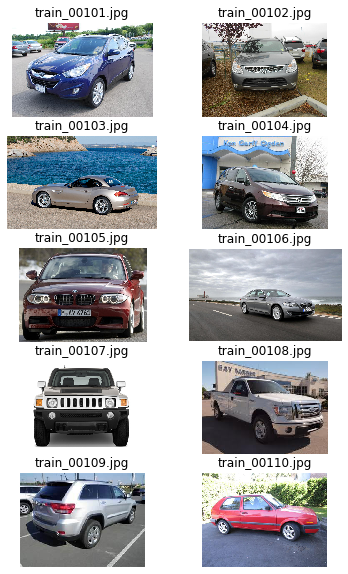

In [0]:
import PIL
from PIL import ImageDraw

tmp_imgs = df_train['img_file'][100:110]
plt.figure(figsize=(6,10))

for num, f_name in enumerate(tmp_imgs):
    img = PIL.Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
    plt.subplot(5, 2, num + 1)
    plt.title(f_name)
    plt.imshow(img)
    plt.axis('off')

#### Bounding Box
이미지 대회를 처음 해보시는 분이라면, 바운딩 박스라는 개념이 생소할 수 있습니다.

- 바운딩 박스란?
  - 이미지 내부에서 특정 Object를 박스로 레이블한 좌표를 말합니다.
  - 보통 좌측 상단 (x1, y1)과, 우측 하단 (x2, y2) 좌표가 주어져서
직사각형 모양의 박스를 그릴 수 있게됩니다. (좌표=이미지의 픽셀 좌표)

In [0]:
def draw_rect(drawcontext, pos, outline=None, width=0):
    (x1, y1) = (pos[0], pos[1])
    (x2, y2) = (pos[2], pos[3])
    points = (x1, y1), (x2, y1), (x2, y2), (x1, y2), (x1, y1)
    drawcontext.line(points, fill=outline, width=width)

def make_boxing_img(img_name) :
    if img_name.split('_')[0] == "train" :
        PATH = TRAIN_IMG_PATH
        data = df_train
    elif img_name.split('_')[0] == "test" :
        PATH = TEST_IMG_PATH
        data = df_test
        
    img = PIL.Image.open(os.path.join(PATH, img_name))
    pos = data.loc[data["img_file"] == img_name, \
                   ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)
    draw = ImageDraw.Draw(img)
    draw_rect(draw, pos, outline='red', width=10)
    
    return img

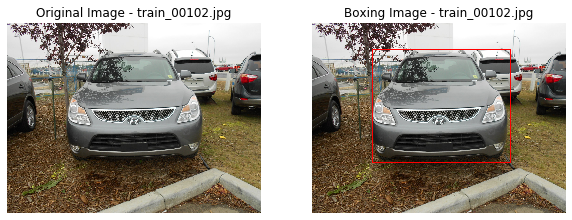

In [0]:
f_name = "train_00102.jpg"

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
# Original Image
origin_img = PIL.Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
plt.title("Original Image - {}".format(f_name))
plt.imshow(origin_img)
plt.axis('off')

# Image included bounding box
plt.subplot(1, 2, 2)
boxing = make_boxing_img(f_name)
plt.title("Boxing Image - {}".format(f_name))
plt.imshow(boxing)
plt.axis('off')

plt.show()

왼쪽 그림과 같이 필요로 하는 Target Object 뿐 아니라 상관 없는 다른 Object(나무, 배경 등과 같은 노이즈)가 섞여 있을 수 있습니다. 이런 경우에 필요한 Object를 명확히 표시하기 위해 Bounding Box를 사용합니다. (실제로 이미지를 모델에 넣을 때 Box 바깥 부분은 잘라 버립니다.)

KaKR3rd 대회의 데이터셋은 Bounding Box 좌표를 이미 제공하고 있습니다. 만약 Bounding Box 좌표가 주어지지 않았다면 직접 레이블을 하거나, Bounding Box 좌표를 예측하는 딥러닝 모델(detection)을 설계해볼 수도 있습니다.

### 1.5 Crop image data

베이스라인에서는 바운딩 박스를 활용해 이미지를 전처리하는 과정을 포함하고 있지 않으므로, 지금부터 바운딩 박스의 영역만 남기고 나머지 부분은 제거해 기존 이미지들을 수정해 보겠습니다. 

In [0]:
def crop_boxing_img(img_name, margin=16) :
    if img_name.split('_')[0] == "train" :
        PATH = TRAIN_IMG_PATH
        data = df_train
    elif img_name.split('_')[0] == "test" :
        PATH = TEST_IMG_PATH
        data = df_test
        
    img = PIL.Image.open(os.path.join(PATH, img_name))
    pos = data.loc[data["img_file"] == img_name, \
                   ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)

    width, height = img.size
    x1 = max(0, pos[0] - margin)
    y1 = max(0, pos[1] - margin)
    x2 = min(pos[2] + margin, width)
    y2 = min(pos[3] + margin, height)
    
    if abs(pos[2] - pos[0]) > width or abs(pos[3] - pos[1]) > height:
        print(f'{img_name} is wrong bounding box, img size: {img.size},  bbox_x1: {pos[0]}, bbox_x2: {pos[2]}, bbox_y1: {pos[1]}, bbox_y2: {pos[3]}')
        return img

    return img.crop((x1,y1,x2,y2))

#### 1.5.1 Train and Test image data crop
이미지를 자르기 전에, 잘린 이미지들이 저장될 디렉토리를 먼저 만들어 주도록 하겠습니다. 

In [0]:
import os

# 잘린 이미지 폴더 경로
CROPPED_TRAIN_IMG_PATH = os.path.join(DATA_PATH, 'cropped_train')
CROPPED_TEST_IMG_PATH = os.path.join(DATA_PATH, 'cropped_test')

if not os.path.isdir(CROPPED_TRAIN_IMG_PATH and CROPPED_TEST_IMG_PATH):
    os.mkdir(CROPPED_TRAIN_IMG_PATH)
    os.mkdir(CROPPED_TEST_IMG_PATH)

In [0]:
!dir

class.csv     cropped_train  sample_submission.csv  test      train
cropped_test  sample_data    submission.csv	    test.csv  train.csv


In [0]:
import os
from tqdm.notebook import tqdm # 함수가 잘 실행되는지 확인하기 위해 tqdm 모듈을 사용합니다. 

for i, row in tqdm(df_train.iterrows(), total=df_train.shape[0]):
  cropped = crop_boxing_img(row['img_file'])
  cropped.save(os.path.join(CROPPED_TRAIN_IMG_PATH, row['img_file']))

In [0]:
for i, row in tqdm(df_test.iterrows(), total=df_test.shape[0]):
    cropped = crop_boxing_img(row['img_file'])
    cropped.save(os.path.join(CROPPED_TEST_IMG_PATH, row['img_file']))

#### 1.5.2 Checking cropped images
이미지를 몇 장 골라 제대로 crop되었는지 확인해 보겠습니다.

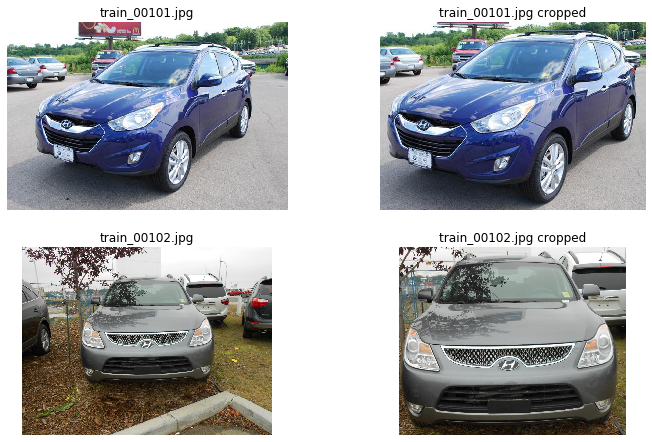

In [0]:
tmp_imgs = df_train['img_file'][100:102]
plt.figure(figsize=(12,20))

for num, f_name in enumerate(tmp_imgs):
    img = PIL.Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
    plt.subplot(5, 2, 2*num + 1)
    plt.title(f_name)
    plt.imshow(img)
    plt.axis('off')
    
    img_crop = PIL.Image.open(os.path.join(CROPPED_TRAIN_IMG_PATH, f_name))
    plt.subplot(5, 2, 2*num + 2)
    plt.title(f_name + ' cropped')
    plt.imshow(img_crop)
    plt.axis('off')

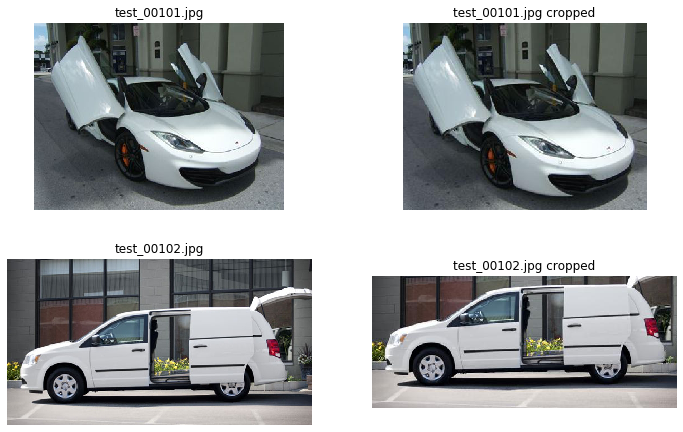

In [0]:
tmp_imgs = df_test['img_file'][100:102]
plt.figure(figsize=(12,20))

for num, f_name in enumerate(tmp_imgs):
    img = PIL.Image.open(os.path.join(TEST_IMG_PATH, f_name))
    plt.subplot(5, 2, 2*num + 1)
    plt.title(f_name)
    plt.imshow(img)
    plt.axis('off')
    
    img_crop = PIL.Image.open(os.path.join(CROPPED_TEST_IMG_PATH, f_name))
    plt.subplot(5, 2, 2*num + 2)
    plt.title(f_name + ' cropped')
    plt.imshow(img_crop)
    plt.axis('off')

### 1.6 K-fold validation(split train and validation set into multiple sets)
머신 러닝에서는 일반적으로 주어진 Train 데이터를 아래와 같이 Train/Validation으로 나누는 작업을 수행합니다. 아마 지난 시간에 잠시 언급드린 적이 있을 텐데요, 오늘 이 시간에 보다 더 자세히 짚고 넘어가 보도록 하겠습니다. Training sample의 수가 많으면 좋을 텐데 굳이 왜 K-fold cross validation이라는 과정을 통해 train과 validation set을 나누는 것일까요?

<img src='http://drive.google.com/uc?export=view&id=1hFTOBncr9NfwUS1ITDKavK5ZqrUCRpLl' /><br>

저희는 학습을 마친 후 모델이 잘 일반화 되었는지 확인할 필요가 있습니다. 하지만 데이터셋의 크기가 작은 경우 테스트셋을 활용한 성능 평가의 신뢰성이 떨어지게 된다는 문제점이 존재합니다. 테스트 셋에 따라 성능 평가의 결과가 각각 다르게 나온다면 모델을 객관적으로 평가할 수 없겠죠. 따라서 머신 러닝에서는 Cross validation이라고 부르는 검증 방식을 자주 사용합니다. 모든 데이터가 최소 한 번은 테스트 셋으로 쓰이도록 하여 모델의 성능을 구해 보는 것이죠. 

아래 그림은 5-fold cross validation을 도식화한 그림입니다. 5-fold cross validation의 경우는 하나의 Train set을 다섯 개로 균등하게 쪼갠 후 매 이터레이션마다 순서를 달리 해 모델 성능 평가에 활용하게 됩니다. 

<img src='http://drive.google.com/uc?export=view&id=1KVJDjSlIylloz7Rgm-Bk6Y_Oa1L3lxVt' /><br>

지난 시간에 잠시 언급했지만, Train과 validation, test set은 상황과 코드 맥락에 따라 이해할 필요가 있다고 말씀드렸습니다. 지난 시간의 내용을 상기하면서, 저희 상황에 이 cross validation을 끌어다 생각해 보겠습니다. Kaggle에서 진행되는 컴페티션의 경우 보통 평가를 위한 Test 데이터가 따로 주어집니다. 그래서 저희는 보통 Training 데이터로 모델을 만들고 테스트 데이터로 모델의 성능을 평가한 후 리더보드에 성능을 제출하게 되죠. 그러나 대회에 따라 하루에 제출할 수 있는 횟수가 제한되어 있기 때문에 정해진 횟수를 넘겨 제출한 뒤로는 더이상 검증을 할 수 없게 됩니다. 모의고사를 최대한 많이 치루어 일반화 성능을 높일 수 있도록 모델을 튜닝하는 것이 중요하기 때문에, 저희는 검증 작업을 많이 할수록 유리합니다. 얼마나 괜찮은 모델인지 검증 데이터를 통해 대회 서버에 제출해보지 않고도 성능 평가를 진행해 볼 수 있다면 보다 다양한 시도를 해 볼 수 있겠죠. 

비슷한 맥락에서, Cross validation은 아래의 두 가지 큰 목적을 갖고 있다고 요약해 볼 수 있겠습니다. 

1. 처음 보는(Unseen) test data에 대한 모델의 성능 예측
2. 더 좋은 모델 및 Hyperparameter를 선택하기 위함

`Keras` 프레임워크를 사용하면 이 Cross validation 작업을 더 수월하게 진행할 수 있지만 저희는 `Pytorch`를 사용하기 때문에, 5-fold cross validation을 구성한 후 `csv`파일로 저장해 관리하겠습니다. 물론 `Pytorch` 프레임워크에도 cross validation 작업을 수월하게 도와주는 third party wrapper 라이브러리가 있지만 다음에 기회가 되면 알려드리도록 하겠습니다. 

In [0]:
from pathlib import Path
from collections import defaultdict, Counter

def make_folds(n_folds=3, df=None):
    cls_counts = Counter([classes for classes in df['class']])
    fold_cls_counts = defaultdict()
    for class_index in cls_counts.keys():
        fold_cls_counts[class_index] = np.zeros(n_folds, dtype=np.int)

    df['fold'] = -1
    pbar = tqdm(total=len(df))

    def get_fold(row):
        class_index = row['class']
        counts = fold_cls_counts[class_index]
        fold = np.argmin(counts)
        counts[fold] += 1
        fold_cls_counts[class_index] = counts
        row['fold']=fold
        pbar.update()
        return row
    
    df = df.apply(get_fold, axis=1)
    return df

In [0]:
cv_df = make_folds(n_folds=5, df=df_train)
cv_df.to_csv('folds.csv', index=None)

In [0]:
!dir

class.csv      folds.csv	      submission.csv  train
cropped_test   sample_data	      test	      train.csv
cropped_train  sample_submission.csv  test.csv


파일이 잘 생성되었군요! 

### 1.7 Preparing for training
이제부터는 모델 학습을 위한 준비를 진행해 보겠습니다.

#### 1.7.1 fix random seed and check environments
학습을 시작하기 전, Hyperparameter를 튜닝하기 위해 모든 랜덤시드값을 고정하겠습니다. 시드값을 고정하지 않으면 라이브러리나 프레임워크에 따라 각기 다른 seed number가 적용되어 난수가 각자 다르게 생성될 것이고, 그렇게 되면 hyperparameter를 바꿀 때마다 의도치 않은 결과물이 유발될 수 있습니다. 

In [0]:
import torch, random, math, time, glob, os
import numpy as np
from PIL import Image, ImageEnhance, ImageOps
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm 

from torch import nn, cuda
from torch.autograd import Variable 
import torch.nn.functional as F
import torchvision
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam, SGD, Optimizer
from torch.optim.lr_scheduler import _LRScheduler, CosineAnnealingLR, ReduceLROnPlateau

from sklearn.metrics import f1_score

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

SEED = 2020
seed_everything(SEED)

그 다음으로, GPU를 사용할 수 있는 상태인지 알아 보도록 하겠습니다. `torch`의 `cuda`모듈을 활용하면 현재 cuda device를 사용할 수 있는 상황인지 체크해 볼 수 있습니다. 부가적으로, 터미널에 `nvidia-smi`를 입력하면 현재 할당된 장비의 이름과 용량 및 사용량을 확인할 수 있습니다. `nvcc --version` 커맨드는 CUDA 라이브러리의 버전을 확인하는 명령어이고, 그 밑의 커맨드는 cuDNN 라이브러리의 버전을 불러 오는 명령어입니다. google colab뿐만 아니라 개인 및 연구실 서버를 사용하실 때에도 동일하게 아래의 명령어를 활용하시면 내가 현재 사용 가능한 가용 자원을 한눈에 확인하실 수 있습니다. (`nvidia-smi`의 경우 `watch -n 1 nvidia-smi`명령어를 사용하면 1초 단위로 새로고침해 정보를 받아올 수 있습니다.)

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [0]:
use_cuda = cuda.is_available()
use_cuda

True

In [0]:
!nvidia-smi
!nvcc --version
!cat /usr/include/cudnn.h | grep -E "CUDNN_MAJOR|CUDNN_MINOR|CUDNN_PATCHLEVEL"

Fri Jan  3 08:50:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    11W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

#### 1.7.2 make pytorch dataset
지난 시간 MNIST 튜토리얼에서 알려 드린 대로 파이토치 모듈(모델로 이해하셔도 무방합니다.)에 데이터를 feeding해주기 위해 dataset 클래스를 정의해 주도록 하겠습니다. 

In [0]:
class TrainDataset(Dataset):
    def __init__(self, df, mode='train', transforms=None):
        self.df = df
        self.mode = mode
        self.transform = transforms[self.mode]
        
    def __len__(self):
        return len(self.df)
            
    def __getitem__(self, idx):
        image = Image.open(TRAIN_IMAGE_PATH / self.df['img_file'][idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = self.df['class'][idx]

        return image, label

    
class TestDataset(Dataset):
    def __init__(self, df, mode='test', transforms=None):
        self.df = df
        self.mode = mode
        self.transform = transforms[self.mode]
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        image = Image.open(TEST_IMAGE_PATH / self.df[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
            
        return image  

이제 Image data augmentation을 위한 `transforms`를 정의해 주도록 하겠습니다. 각 함수들에 대한 자세한 설명은 https://pytorch.org/docs/stable/torchvision/transforms.html에서 확인해 보실 수 있습니다.

Data augmentation이란 무엇일까요? 그리고 왜 해야 하는 것일까요?

우선 Augmentation이라는 단어는 우리말로 '증강'이라는 뜻입니다. 모델을 train할 때 적은 데이터 수로 인한 오버피팅을 방지하기 위해선 데이터 샘플의 개수를 많이 확보하는 것이 중요합니다. 하지만 훈련 데이터를 많이 확보하기 어려운 상황이라면, data augmentation기법들을 활용해 기존에 갖고 있던 데이터들을 뻥튀기를 만들듯 부풀려 줄 수 있습니다. data augmentation을 통해 모델이 좀 더 robust하게 일반화된 성능을 보여줄 수 있게 해 주려는 의도인 것이죠.

<img src='http://drive.google.com/uc?export=view&id=1Y2m9GtiBnoe2pX-zDW1jgUVP2JMubak-' /><br>
(출처 : ["Benchmarking Robustness in Object Detection: Autonomous Driving when Winter is Coming"](https://arxiv.org/pdf/1907.07484v1.pdf))

저희는 이번 시간에 가장 단순한 augmentation 기법들을 다뤄 보지만, 일반적으로 실무에서는 태스크와 데이터의 종류 및 특성에 따라 주의를 기울여야 합니다. 모델의 성능을 오히려 깎을 수도 있기 때문입니다. 위 이미지를 가져 온 논문은 눈과 비가 오고 모래가 흩날리는 자율주행 환경에서 어떻게 기존 detection 알고리즘들을 보다 robust하게 만들 수 있을까라는 주제를 다루고 있습니다. 노이즈들의 생김새를 살펴 보면 실제 발생이 가능할 법한 이미지들을 인위적으로 만들어 주고 있죠.


<blockquote>
<b>-- NOTE --</b><br>
단, pytorch는 transforms를 적용할 때 dataset size를 증가시켜 주지는 않습니다. https://discuss.pytorch.org/t/data-augmentation-in-pytorch/7925 이 디스커션을 참고해 보면, static augmentation과 동일하므로 전체 이미지 장수가 늘어나지는 않습니다. 따라서 데이터셋 자체의 장수를 증강시키고 싶다면 dataset class에서 len과 get_item을 수정해야 합니다. 
</blockquote>

<blockquote>
<b>-- NOTE --</b><br>
비전 분야에서 자주 사용되는 'Robustness'라는 표현은 어떤 의미를 담고 있는 걸까요? 일반적으로 Robustness라는 표현은 노이즈, occlusion의 정도 및 이미지가 수집되는 상황에 따라 모델이 강건하게 대응할 수 있는지에 대한 것으로, Robustness가 높으면 부정적인 상황에서도 모델의 성능이 흔들리지 않는다고 볼 수 있습니다. 영상의 광학적, 기하학적 변환이 발생함에도 불구하고 모델이나 알고리즘이 원하는 성능을 보여 주는가에 대한 표현인 것이죠. 태스크마다 정의는 조금씩 다르겠지만 일반적인 의미는 이렇게 사용됩니다. 
</blockquote>

In [0]:
target_size = (224, 224)

data_transforms = {
    'train': torchvision.transforms.Compose([
        torchvision.transforms.Resize(target_size), # target_size 해상도로 이미지를 리사이즈합니다. 
        torchvision.transforms.RandomHorizontalFlip(), # 이미지를 랜덤하게 수평 반전시킵니다. 
        torchvision.transforms.RandomRotation(20), # 이미지를 랜덤하게 rotate합니다. 인자는 각도를 의미합니다. 
        torchvision.transforms.ToTensor(), # torch tensor로 변환해 줍니다. 
        torchvision.transforms.Normalize( # 이미지를 z-score standardize해줍니다. 
            [0.485, 0.456, 0.406], 
            [0.229, 0.224, 0.225])
    ]),
    'valid': torchvision.transforms.Compose([
        torchvision.transforms.Resize(target_size),
        torchvision.transforms.RandomResizedCrop(target_size, scale=(0.8,1.0)), # 주어진 이미지를 인자로 넣어 준 범위 내에서 임의의 크기 및 종횡비로 자르는 함수입니다. 
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            [0.485, 0.456, 0.406], 
            [0.229, 0.224, 0.225])
    ]),
    'test': torchvision.transforms.Compose([
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.RandomResizedCrop(target_size, scale=(0.8,1.0)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            [0.485, 0.456, 0.406], 
            [0.229, 0.224, 0.225])
    ]),
}

이제 아까 crop한 후 새로운 디렉토리에 저장했던 cropped images를 불러 오겠습니다.

In [0]:
!dir

class.csv      folds.csv	      submission.csv  train
cropped_test   sample_data	      test	      train.csv
cropped_train  sample_submission.csv  test.csv


In [0]:
# 잘린 이미지들이 저장되어 있는 디렉토리를 각각 TRAIN_IMAGE_PATH와 TEST_IMAGE_PATH로 지정
TRAIN_IMAGE_PATH = Path('./cropped_train')
TEST_IMAGE_PATH = Path('./cropped_test')

위에서 5-fold cross validation을 구성하며 만들었던 `folds.csv`를 `fivefold_df`라는 이름의 pandas dataframe으로 읽어 오겠습니다. `fivefold_df`가 가지고 있는 맨 마지막 column `fold`는 `0`~`4`의 unique한 `int`형 value로 구성되어 있기 때문에, 원하는 fold를 손쉽게 불러올 수 있습니다. 

In [0]:
# 5-fold cross validation된 csv파일 불러오기
fivefold_df = pd.read_csv("./folds.csv")
test_csv = pd.read_csv('./test.csv')
fivefold_df.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fold
0,train_00001.jpg,1,80,641,461,108,1
1,train_00002.jpg,57,53,293,236,71,0
2,train_00003.jpg,35,42,227,160,76,0
3,train_00004.jpg,10,21,254,165,188,0
4,train_00005.jpg,1,67,772,573,44,0


각 fold의 길이를 찍어 보면 비율을 확인해 볼 수 있습니다. 

In [0]:
len(fivefold_df[fivefold_df['fold'] == 0]), len(fivefold_df[fivefold_df['fold'] == 1]), len(fivefold_df[fivefold_df['fold'] == 2]), \
len(fivefold_df[fivefold_df['fold'] == 3]), len(fivefold_df[fivefold_df['fold'] == 4])

(2080, 2041, 2010, 1965, 1920)

이제, 0번째 fold를 validation set으로, 0이 아닌 나머지 columns는 train set으로 하여 train set과 validation set을 구성해 보겠습니다. `dataframe.head()`로 `fold` column의 값을 확인해 보세요.

In [0]:
train_df = fivefold_df.loc[fivefold_df['fold'] != 0]
valid_df = fivefold_df.loc[fivefold_df['fold'] == 0]

In [0]:
train_df.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fold
0,train_00001.jpg,1,80,641,461,108,1
13,train_00014.jpg,44,113,609,319,108,2
21,train_00022.jpg,21,27,249,145,108,3
37,train_00038.jpg,68,84,696,466,135,1
40,train_00041.jpg,129,94,502,382,76,1


In [0]:
valid_df.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fold
1,train_00002.jpg,57,53,293,236,71,0
2,train_00003.jpg,35,42,227,160,76,0
3,train_00004.jpg,10,21,254,165,188,0
4,train_00005.jpg,1,67,772,573,44,0
5,train_00006.jpg,220,313,1054,976,29,0


`bbox` 및 `fold` 정보는 더이상 학습에 쓸모가 없기 때문에, file name과 class정보만 남은 새로운 dataframe을 만들겠습니다. (단, `fold` column은 다음 fold로 훈련 및 검증 과정을 수행할 때 필요하므로, 해당 부분만 유의해 관리해 주세요.)

In [0]:
train_df.loc[train_df['class'] == 0].head(3)

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fold


In [0]:
train_df.loc[train_df['class'] == 196].head(3)

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fold
75,train_00076.jpg,121,87,465,278,196,1
251,train_00252.jpg,73,107,600,426,196,2
290,train_00291.jpg,18,5,122,82,196,3


In [0]:
# img_file과 class column을 제외한 다른 columns는 버리고 인덱스 정보를 초기화합니다.
train_df = train_df[['img_file', 'class']].reset_index(drop=True)
valid_df = valid_df[['img_file', 'class']].reset_index(drop=True)
x_test = test_csv['img_file']

# model train시 0번 클래스가 존재하지 않으면 device-side assert가 발생하므로 replace를 통해 0번 클래스를 만들어 줍니다. 
train_df.replace(196, 0, inplace=True) 
valid_df.replace(196, 0, inplace=True) 

num_classes = train_df['class'].nunique() # nunique는 unique한 value의 개수를 반환합니다. 
y_true = valid_df['class'].values # cross validation score를 계산하기 위한 classes입니다. 

In [0]:
train_df.loc[train_df['class'] == 196].head(5)

,img_file,class


In [0]:
train_df.head()

,img_file,class
0,train_00001.jpg,108
1,train_00014.jpg,108
2,train_00022.jpg,108
3,train_00038.jpg,135
4,train_00041.jpg,76


In [0]:
print("number of train dataset: {}".format(len(train_df)))
print("number of valid dataset: {}".format(len(valid_df)))
print("number of classes to predict: {}".format(num_classes))

number of train dataset: 7936
number of valid dataset: 2080
number of classes to predict: 196


이제 지금까지 만들어 준 train과 test dataframe을 위에서 만들었던 `TrainDataset`클래스에 `data_transforms` 정보와 함께 넘겨 배치 단위로 파이토치 모듈(모델)에 feeding할 수 있도록 정의해 주겠습니다.

In [0]:
batch_size = 128 # 모델에 한번에 들어갈 이미지의 장수를 지정해 줍니다. 

train_dataset = TrainDataset(train_df, mode='train', transforms=data_transforms)
valid_dataset = TrainDataset(valid_df, mode='valid', transforms=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

#### 1.7.3 Define model and optimizer
이제부터 간단한 모델(`ResNet-50`)과 이 모델이 길을 잘 찾을 수 있도록 도와 줄 `optimizer`를 정의해 보겠습니다. 많은 튜토리얼들에서, 모델이 최적해를 찾아 나아가는 과정을 산골짜기 탐험에 비유합니다. 마침 직관적으로 대체 모델이 어떤 공간에서 탐색을 시도하는지 직관적으로 이해할 수 있는 좋은 이미지가 있네요. 

<img src='http://drive.google.com/uc?export=view&id=15R4jEVlN2LEy6ODE2m9iiIpPV4VvXjuS'><br>
(출처 : [Losslandscape.com](https://losslandscape.com/) )

우리의 모델은 학습을 진행하는 동안 gradient descent 기법을 사용해 global minima를 찾아 모험을 떠납니다. 그리고 모델이 한걸음 한걸음 내딛는 surface는 상상하는 것 이상으로 대단히 복잡하죠. 이 loss surface가 흉측할수록 모델은 갈피를 잡지 못하며 크게 흔들릴 겁니다. 그 결과를 저희는 loss plot을 통해 어림짐작해 볼 수 있죠. 훈련에 앞서 수행하는 다양한 normalization과 standardization 기법들은 결국 이러한 surface를 안정화시켜 모델의 수렴 속도와 학습 안정성을 향상시키는 것이 목표입니다. Optimization이라는 용어는 수학에서 많이 사용되는 용어로, 따라서 Convex optimization이라는 분야가 따로 존재합니다. 한 시스템(모델)의 상태를 에너지로 여기고, 에너지 최소화 문제로 생각하는 것이죠. 적절한 설명이라고 보기는 어렵습니다만, 위 그림에서는 loss의 높이가 갖는 위치를 에너지라고 생각하고 최소화해볼 수 있겠네요.

딥러닝이 loss function을 통해 loss가 낮아지는 방향으로 학습한다는 것은 다들 알지만 사실 해당 컨셉이 직관적으로 이해가 되지는 않을 것입니다. 아래의 동영상 두 개를 함께 보시죠.


In [0]:
from IPython.display import VimeoVideo

#@markdown 이 영상은 간단한 CNN가 학습되는 과정의 loss surface를 영상으로 시각화한 것입니다. 왼쪽 상단 learning rate의 변화에 따라 loss surface가 어떻게 변화하는지 지켜 보세요.
VimeoVideo('358878166', width=1000, height=500)

In [0]:
VimeoVideo('314916010', width=1000, height=500)
#@markdown 이 영상은 다양한 값으로 SGD optimizer를 조정해 학습을 진행하며 어떻게 최적화가 진행되는지 시각화한 영상입니다. 

영상과 같이 hypothesis function이 convex한 형태라면 우리의 `optimizer`는 최적값을 좀 더 빠르고 정확하게 찾아낼 수 있을 것입니다. 다양한 GD 기반의 학습 기법들이 이 가설함수를 convex하다고 가정하고 문제를 풀고 있지만, 실제로 convex한지는 증명하기 어렵습니다. 이 이상으로는 대학원 이상의 지식이 필요하기 때문에, 여기서 다시 코드로 돌아가도록 하겠습니다.

이번 튜토리얼에서는 `ResNet-50`이라는 CNN 모델을 사용하도록 하겠습니다. 지난 시간 `AlexNet`보다 훨씬 복잡한 모델로, 2015년 ILSVRC 대회에서 우승한 모델입니다. top-5 error가 3.6%로, 사람의 수준인 5% 내외를 뛰어넘은 모델이죠. (논문은 https://arxiv.org/pdf/1512.03385.pdf 에서 읽어 보실 수 있습니다.)

<img src='http://drive.google.com/uc?export=view&id=11Dzg3DL-GinCEDX9vxMg48AOxYBE8MkE' /><br>

ResNet 이전의 네트워크들은 레이어의 깊이가 깊어질수록 overfitting과 saturation이라고 하는 문제가 발생했습니다. 그 결과 수렴이 잘 되지 않는 문제가 존재했죠. 깊은 네트워크에서 학습이 어려운 이유는 크게 두 가지가 있습니다. 

1. <b>Vanishing/Exploding Gradient문제 :</b> CNN에서 weight 업데이트를 할 때 gradient값이 너무 크거나 작은 값으로 포화(saturation)되어 더 이상 움직이지 않으면 학습의 효과가 더 이상 없어지거나 학습 속도가 아주 느려집니다. 이러한 문제는 망이 깊어질수록 더욱 심해지며, 이 문제를 피하기 위해 Batch Normalization, 파라미터의 Initialization 방법 개선 등의 기법이 적용되고 있으나 일정 개수 이상의 Layer부터는 여전히 문제가 잔존하게 됩니다. 
2. <b>학습방법이 더 어렵고 까다로워지는 문제 :</b> 네트워크가 깊어지면 파라미터(weight)의 수가 비례적으로 늘어나며, overfitting 문제 뿐만 아니라 에러가 지속적으로 커져 수렴이 어려워지는 상황이 발생합니다.

이에 ResNet은 Residual Learning(잔차 학습)이라고 하는 구조를 도입해 보다 깊게 레이어를 쌓아도 학습이 잘 수행될 수 있도록 했습니다. 모델 자체에 대한 자세한 설명은 Deeperence 원노트 `머신러닝스터디→유용한 자료→다양한 ML Algorithms→[NN]ResNet(ILSVRC-2015 Original) - Kaiming He et al.`를 참고하시고, 저희는 코드에 집중하도록 하겠습니다.


In [0]:
model = models.resnet50(pretrained=True) # pretrained=True로 설정하면 ImageNet으로 사전 훈련된 모델 weight를 사용하게 됩니다. 
model.fc = nn.Linear(2048, num_classes)
model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 26.0MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

이제, Train과 validation을 위한 함수(`train_one_epoch`, `validation`)를 정의하겠습니다. 이 함수들은 에폭마다 정해진 배치 사이즈만큼 이미지를 모델에 feeding해 가며 학습을 수행합니다. 각 함수에 대한 자세한 설명은 지난 시간의 자료를 참고해 보세요.

In [0]:
# for i, row in tqdm(df_train.iterrows(), total=df_train.shape[0]):

def train_one_epoch(device, model, criterion, train_loader, optimizer):
    model.train()
    train_loss = 0.
    optimizer.zero_grad()

    for i, (inputs, targets) in tqdm(iterable=enumerate(train_loader), desc='Training Step: ', total=len(train_loader), leave=False):
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item() / len(train_loader)
        
    return train_loss

In [0]:
def to_np(t):
    return t.cpu().detach().numpy()

def validation(device, model, criterion, valid_loader):
    model.eval()
    valid_preds = np.zeros((len(valid_dataset), num_classes))
    val_loss = 0.
    
    with torch.no_grad():
        for i, (inputs, targets) in tqdm(iterable=enumerate(valid_loader), desc='Validation Step: ', total=len(valid_loader), leave=False):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs).double()
            loss = criterion(outputs, targets)
            valid_preds[i * batch_size: (i+1) * batch_size] = to_np(outputs)
            val_loss += loss.item() / len(valid_loader)
        y_pred = np.argmax(valid_preds, axis=1)
        val_score = f1_score(y_true, y_pred, average='micro')  
        
    return val_loss, val_score  

이제, 전체 학습 루틴을 관장하는 `train_model` 함수를 정의하겠습니다. fine tuning 여부를 `bool`값으로 넘겨받아 `optimizer`과 `learning rate scheduler`를 케이스별로 정의하는 부분 이후에 전체 에폭 수만큼 학습을 수행하게 됩니다. train step이 끝난 후 validation이 수행되어 score를 기록하고, 가장 높은 score를 기록한 모델이 자동 저장되도록 짜여 있습니다. 이후 validation score를 `scheduler.step`에 넘겨 줌으로서 다음 번의 learning rate를 설정해 줍니다.

<b>fine-tuning</b>은 기존에 학습되어져 있는 모델을 기반으로 우리가 가진 데이터셋에 맞게 조금씩 다시 학습하는 것을 의미합니다. 이미 학습이 되어 있는 모델의 weights 정보로부터 우리의 데이터셋에 맞게 말 그대로 미세 조정하는 것이죠. 보통 모델의 맨 뒷단에 붙어 있는 fully-connected layer과 softmax를 제거한 후 새 구조를 붙여 학습하게 됩니다. 새 구조는 새롭게 초기화된 fully-connected layer과 softmax가 될 수도 있겠고, 무언가 새로운 레이어를 붙여 만들 수도 있겠죠. 이때 주의해야 할 점은, 사전에 미리 학습된 레이어들의 가중치가 변해서는 안된다는 점입니다. 그렇게 되면 전체 파라미터가 망가지는 문제가 발생하며, fine-tuning을 하는 의미가 퇴색되죠.

fine-tuning은 A라는 목적을 위해 학습된 모델로 우리의 B 문제를 푸는 것이므로 전이 학습(transfer learning)이라 부르기도 합니다. 보통 임의의 값으로 초기화한 파라미터를 갖고 처음부터 다시 학습하는 것보다 월등히 빠른 학습 속도와 정확도를 보여 주기 때문에 각종 대회에서 이러한 기법들은 우승의 키가 됩니다. 대회 뿐만이 아니라 전반적인 부분에서 굉장히 자주 쓰이는 기법이므로 알아 두는 것이 좋습니다.

<b>Learning rate scheduler</b>는 정해진 조건에 따라 learning rate를 변경해 주는 함수입니다. 기존까지 배웠던 learning rate는 고정값이었지만, 현업에서는 다음과 같이 다양한 learning rate를 사용합니다. 이 lr을 사람이 스케쥴링해 주기는 귀찮으니 미리 정해진 조건이나 상황에 따라 자동으로 스케쥴링이 되도록 구현한 함수인 것이죠. 

<img src='http://drive.google.com/uc?export=view&id=1mcW_RXTkfoPUansJjrj-414QQXiPl_0y' /><br>

최근 연구 결과에 따르면, [0~1까지 무작정 lr을 올려 버리는 warm up 과정을 거친 후 cosine 그래프를 그리며 lr을 decay해주는 것이 경험적으로 학습에 좋다](https://arxiv.org/abs/1812.01187)는 것이 증명되었습니다. 

<img src='http://drive.google.com/uc?export=view&id=1kEeChn_WYbfGlRdKuOeTzS0J1Guox77R' /><br>

<img src='http://drive.google.com/uc?export=view&id=1YqsxIuppY5U7HJW48eNPK3pkPBuY9yO3' /><br>

이러한 warmup+cosine annealing learning rate scheduler의 경우는 또다시 전체 에폭에 걸쳐 cosine 그래프 모양으로 decay를 할지, 특정 period 사이에서 warmup+cosine annealing 패턴을 반복할지 두 가지로 나뉩니다. 이 모든 과정들은 정답이 존재하지 않기 때문에, 오롯이 수많은 테스트와 학습을 통해서 결정해야 합니다. 정말 공부할 것이 많군요.

In [0]:
class CosineAnnealingWithRestartsLR(_LRScheduler):
    '''
    SGDR\: Stochastic Gradient Descent with Warm Restarts: https://arxiv.org/abs/1608.03983
    code: https://github.com/gurucharanmk/PyTorch_CosineAnnealingWithRestartsLR/blob/master/CosineAnnealingWithRestartsLR.py
    added restart_decay value to decrease lr for every restarts
    '''
    def __init__(self, optimizer, T_max, eta_min=0, last_epoch=-1, T_mult=1, restart_decay=0.95):
        self.T_max = T_max
        self.T_mult = T_mult
        self.next_restart = T_max
        self.eta_min = eta_min
        self.restarts = 0
        self.last_restart = 0
        self.T_num = 0
        self.restart_decay = restart_decay
        super(CosineAnnealingWithRestartsLR,self).__init__(optimizer, last_epoch)

    def get_lr(self):
        self.Tcur = self.last_epoch - self.last_restart
        if self.Tcur >= self.next_restart:
            self.next_restart *= self.T_mult
            self.last_restart = self.last_epoch
            self.T_num += 1
        learning_rate = [(self.eta_min + ((base_lr)*self.restart_decay**self.T_num - self.eta_min) * (1 + math.cos(math.pi * self.Tcur / self.next_restart)) / 2) for base_lr in self.base_lrs]
        return learning_rate

In [0]:
def train_model(device, num_epochs=60, cv_checkpoint=False, fine_tune=False, weight_file_name='weight_best.pt', **train_kwargs):
    # choose scheduler
    if fine_tune:
        lr = 0.00001
        optimizer = AdamW(model.parameters(), lr=lr, weight_decay=0.000025)   
        scheduler = ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.1)
    else:    
        lr = 0.01
        optimizer = SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=0.025)
        eta_min = 1e-6
        T_max = 10
        T_mult = 1
        restart_decay = 0.97
        scheduler = CosineAnnealingWithRestartsLR(optimizer,T_max=T_max, eta_min=eta_min, T_mult=T_mult, restart_decay=restart_decay)

    train_result = {}
    train_result['weight_file_name'] = weight_file_name
    best_epoch = -1
    best_score = 0.
    lrs = []
    score = []
    
    for epoch in tqdm(iterable=range(num_epochs), desc='Epoch: '):
        start_time = time.time() # 학습 반복문의 수행 시간을 계산하기 위해 initial time을 기록합니다. 
        train_loss = train_one_epoch(device, model, criterion, train_loader, optimizer)
        val_loss, val_score = validation(device, model, criterion, valid_loader)
        score.append(val_score)
    
        # model save (score or loss?)
        if cv_checkpoint:
            if val_score > best_score:
                best_score = val_score
                train_result['best_epoch'] = epoch + 1
                train_result['best_score'] = round(best_score, 5)
                torch.save(model.state_dict(), weight_file_name)
        else:
            if val_loss < best_loss:
                best_loss = val_loss
                train_result['best_epoch'] = epoch + 1
                train_result['best_loss'] = round(best_loss, 5)
                torch.save(model.state_dict(), weight_file_name)
        
        elapsed = time.time() - start_time
        
        lr = [_['lr'] for _ in optimizer.param_groups]
        print("Epoch {} - train_loss: {:.4f}  val_loss: {:.4f}  cv_score: {:.4f}  lr: {:.6f}  time: {:.0f}s".format(
                epoch+1, train_loss, val_loss, val_score, lr[0], elapsed))
        
        for param_group in optimizer.param_groups:
            lrs.append(param_group['lr'])
        
        # scheduler update
        if fine_tune:
            if cv_checkpoint:
                scheduler.step(val_score)
            else:
                scheduler.step(val_loss)
        else:
            scheduler.step()
     
    return train_result, lrs, score

이제, loss function을 정의해 주겠습니다. 보통 이런 멀티 클래스 분류 문제는 `CrossEntropyLoss`를 많이 사용합니다. 

In [0]:
criterion = nn.CrossEntropyLoss()

train_kwargs = dict(
    train_loader=train_loader,
    valid_loader=valid_loader,
    model=model,
    criterion=criterion,
    )

print("training starts")
num_epochs = 60 # 학습을 위한 전체 에폭 수를 지정합니다. 
result, lrs, score = train_model(device, num_epochs=num_epochs, cv_checkpoint=True, fine_tune=False, weight_file_name='weight_best.pt', **train_kwargs)
print(result)

training starts


Epoch 1 - train_loss: 4.9401  val_loss: 4.2251  cv_score: 0.1481  lr: 0.010000  time: 159s


Epoch 2 - train_loss: 3.4086  val_loss: 3.1360  cv_score: 0.3303  lr: 0.009755  time: 162s


Epoch 3 - train_loss: 2.3005  val_loss: 2.3981  cv_score: 0.5226  lr: 0.009045  time: 163s


Epoch 4 - train_loss: 1.6767  val_loss: 1.9700  cv_score: 0.6178  lr: 0.007939  time: 163s


Epoch 5 - train_loss: 1.3402  val_loss: 1.6701  cv_score: 0.7048  lr: 0.006545  time: 161s


Epoch 6 - train_loss: 1.1206  val_loss: 1.3719  cv_score: 0.7875  lr: 0.005001  time: 162s


Epoch 7 - train_loss: 0.9562  val_loss: 1.3766  cv_score: 0.7769  lr: 0.003456  time: 162s


Epoch 8 - train_loss: 0.8383  val_loss: 1.1091  cv_score: 0.8524  lr: 0.002062  time: 161s


Epoch 9 - train_loss: 0.7677  val_loss: 1.0499  cv_score: 0.8596  lr: 0.000956  time: 160s


Epoch 10 - train_loss: 0.7360  val_loss: 1.0019  cv_score: 0.8596  lr: 0.000246  time: 160s


Epoch 11 - train_loss: 0.7246  val_loss: 0.9945  cv_score: 0.8721  lr: 0.000001  time: 160s


Epoch 12 - train_loss: 1.1604  val_loss: 2.4591  cv_score: 0.4639  lr: 0.009463  time: 160s


Epoch 13 - train_loss: 1.2287  val_loss: 2.1728  cv_score: 0.5846  lr: 0.008774  time: 160s


Epoch 14 - train_loss: 1.1071  val_loss: 2.0112  cv_score: 0.6173  lr: 0.007701  time: 160s


Epoch 15 - train_loss: 1.0136  val_loss: 1.9377  cv_score: 0.6317  lr: 0.006349  time: 160s


Epoch 16 - train_loss: 0.8839  val_loss: 1.4912  cv_score: 0.7380  lr: 0.004851  time: 160s


Epoch 17 - train_loss: 0.7646  val_loss: 1.2153  cv_score: 0.8269  lr: 0.003352  time: 160s


Epoch 18 - train_loss: 0.6871  val_loss: 1.0118  cv_score: 0.8721  lr: 0.002000  time: 160s


Epoch 19 - train_loss: 0.6332  val_loss: 0.8871  cv_score: 0.8861  lr: 0.000927  time: 159s


Epoch 20 - train_loss: 0.6062  val_loss: 0.8334  cv_score: 0.8966  lr: 0.000238  time: 159s


Epoch 21 - train_loss: 0.6030  val_loss: 0.8244  cv_score: 0.8966  lr: 0.000001  time: 159s


Epoch 22 - train_loss: 1.6392  val_loss: 3.7811  cv_score: 0.1779  lr: 0.009179  time: 159s


Epoch 23 - train_loss: 1.9538  val_loss: 2.5789  cv_score: 0.4500  lr: 0.008511  time: 158s


Epoch 24 - train_loss: 1.5765  val_loss: 2.1436  cv_score: 0.5596  lr: 0.007470  time: 160s


Epoch 25 - train_loss: 1.3395  val_loss: 1.9225  cv_score: 0.6659  lr: 0.006159  time: 159s


Epoch 26 - train_loss: 1.1213  val_loss: 1.5945  cv_score: 0.7197  lr: 0.004705  time: 160s


Epoch 27 - train_loss: 0.9430  val_loss: 1.2691  cv_score: 0.7817  lr: 0.003251  time: 160s


Epoch 28 - train_loss: 0.8387  val_loss: 1.1014  cv_score: 0.8558  lr: 0.001940  time: 160s


Epoch 29 - train_loss: 0.7582  val_loss: 0.9356  cv_score: 0.8736  lr: 0.000899  time: 159s


Epoch 30 - train_loss: 0.7355  val_loss: 0.9011  cv_score: 0.8808  lr: 0.000231  time: 159s


Epoch 31 - train_loss: 0.7221  val_loss: 0.8986  cv_score: 0.8870  lr: 0.000001  time: 159s


Epoch 32 - train_loss: 1.9245  val_loss: 4.0197  cv_score: 0.1404  lr: 0.008903  time: 159s


Epoch 33 - train_loss: 2.0928  val_loss: 3.0008  cv_score: 0.3192  lr: 0.008255  time: 158s


Epoch 34 - train_loss: 1.6702  val_loss: 2.6664  cv_score: 0.4101  lr: 0.007246  time: 158s


Epoch 35 - train_loss: 1.4043  val_loss: 1.9748  cv_score: 0.5875  lr: 0.005974  time: 160s


Epoch 36 - train_loss: 1.1836  val_loss: 1.6909  cv_score: 0.6726  lr: 0.004564  time: 159s


Epoch 37 - train_loss: 1.0070  val_loss: 1.3313  cv_score: 0.7803  lr: 0.003154  time: 158s


Epoch 38 - train_loss: 0.8899  val_loss: 1.0362  cv_score: 0.8534  lr: 0.001882  time: 158s


Epoch 39 - train_loss: 0.8202  val_loss: 0.9817  cv_score: 0.8644  lr: 0.000872  time: 159s


Epoch 40 - train_loss: 0.7892  val_loss: 0.9395  cv_score: 0.8688  lr: 0.000224  time: 159s


Epoch 41 - train_loss: 0.7800  val_loss: 0.9452  cv_score: 0.8678  lr: 0.000001  time: 158s


Epoch 42 - train_loss: 1.8080  val_loss: 3.7426  cv_score: 0.1827  lr: 0.008636  time: 158s


Epoch 43 - train_loss: 2.0845  val_loss: 3.0126  cv_score: 0.3216  lr: 0.008008  time: 160s


Epoch 44 - train_loss: 1.6309  val_loss: 2.3014  cv_score: 0.5087  lr: 0.007028  time: 163s


Epoch 45 - train_loss: 1.3218  val_loss: 2.0161  cv_score: 0.5966  lr: 0.005795  time: 164s


Epoch 46 - train_loss: 1.1475  val_loss: 1.5819  cv_score: 0.7111  lr: 0.004427  time: 164s


Epoch 47 - train_loss: 0.9841  val_loss: 1.2447  cv_score: 0.7851  lr: 0.003059  time: 166s


Epoch 48 - train_loss: 0.8716  val_loss: 1.0579  cv_score: 0.8351  lr: 0.001825  time: 164s


Epoch 49 - train_loss: 0.8208  val_loss: 0.9559  cv_score: 0.8572  lr: 0.000846  time: 162s


Epoch 50 - train_loss: 0.7923  val_loss: 0.9359  cv_score: 0.8702  lr: 0.000218  time: 161s


Epoch 51 - train_loss: 0.7826  val_loss: 0.9319  cv_score: 0.8659  lr: 0.000001  time: 161s


Epoch 52 - train_loss: 1.7755  val_loss: 3.8281  cv_score: 0.1851  lr: 0.008377  time: 160s


Epoch 53 - train_loss: 2.0063  val_loss: 2.6234  cv_score: 0.4332  lr: 0.007767  time: 159s


Epoch 54 - train_loss: 1.5624  val_loss: 2.2243  cv_score: 0.5288  lr: 0.006818  time: 160s


Epoch 55 - train_loss: 1.3312  val_loss: 1.7928  cv_score: 0.6245  lr: 0.005621  time: 161s


Epoch 56 - train_loss: 1.1011  val_loss: 1.5518  cv_score: 0.6947  lr: 0.004294  time: 160s


Epoch 57 - train_loss: 0.9556  val_loss: 1.1750  cv_score: 0.8048  lr: 0.002968  time: 159s


Epoch 58 - train_loss: 0.8557  val_loss: 1.0016  cv_score: 0.8346  lr: 0.001771  time: 159s


Epoch 59 - train_loss: 0.8048  val_loss: 0.9490  cv_score: 0.8558  lr: 0.000821  time: 159s


Epoch 60 - train_loss: 0.7839  val_loss: 0.9294  cv_score: 0.8649  lr: 0.000211  time: 159s

{'weight_file_name': 'weight_best.pt', 'best_epoch': 20, 'best_score': 0.89663}


간혹 학습 과정에서 `device-side assert triggered at /pytorch/aten/src/THC/generic/THCTensorMath.cu:26`과 같은 에러가 발생하는 경우는 클래스에 0이 없기 때문에 발생합니다. 모델을 학습할 때 0번 클래스가 존재하지 않거나, 클래스 개수에 차이가 발생하면 device-side assert 에러가 발생하게 됩니다. 이때는 당황하지 말고 전체 클래스 개수가 동일한지 차분히 확인해 보세요.

### 1.8 inference
이제 가장 학습이 잘 된 모델을 불러와 최종 Test set으로 돌려 본 후 모델 예측 결과를 내어 보겠습니다. 

In [0]:
model = models.resnet50() 
model.fc = nn.Linear(2048, num_classes)
model.to(device)
model.load_state_dict(torch.load(result['weight_file_name']))

batch_size = 1 # 배치 사이즈를 1로 설정하고 데이터로더에서 shuffle=False로 설정하면 순서대로 예측 결과가 나옵니다. 
test_dataset = TestDataset(x_test, mode='test', transforms=data_transforms)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
test_preds = []

with torch.no_grad():
    for i, images in enumerate(tqdm(test_loader)):
        images = images.to(device)
        preds = model(images)
        test_preds.append(to_np(preds))

In [0]:
outputs = []
for _ in test_preds:
    # argmax를 사용해서 가장 높은 확률로 예측한 class 반환합니다.
    predicted_class_indices=np.argmax(_, axis=1).tolist()
    outputs.append(predicted_class_indices)

result = np.concatenate(outputs)

In [0]:
submission = pd.read_csv('./sample_submission.csv')
submission["class"] = result
submission["class"].replace(0, 196, inplace=True) # 196에서 0으로 수정했던 것을 원래대로 되돌려 점수 계산에 오류가 없도록 합니다.
submission.to_csv("submission.csv", index=False)
submission.head()

,img_file,class
0,test_00001.jpg,124
1,test_00002.jpg,98
2,test_00003.jpg,157
3,test_00004.jpg,94
4,test_00005.jpg,18


In [0]:
from google.colab import files
files.download('./submission.csv')

현재 모델 prediction을 csv로 작성하는 과정은 잘 작동하지만, 채점 시 점수가 과도하게 낮게 나오는 문제가 있어 해결중입니다.